In [60]:
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
import csv
import pathlib as Path
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from dotenv import load_dotenv
load_dotenv()

True

In [36]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [37]:
#Auto 2018
timeframe = "1D"
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2018-12-31", tz="America/New_York").isoformat()
tickers = ["F","GM", "TSLA"]
auto2018_tickerdf = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
auto2018_tickerdf.head()

F                                    GM         \
                            open   high    low  close    volume   open   high   
time                                                                            
2018-01-02 00:00:00-05:00  12.52  12.66  12.50  12.65  16690873  41.24  41.87   
2018-01-03 00:00:00-05:00  12.68  12.80  12.67  12.75  24832828  42.21  42.95   
2018-01-04 00:00:00-05:00  12.78  13.04  12.77  12.98  33286107  43.09  44.25   
2018-01-05 00:00:00-05:00  13.06  13.22  13.04  13.19  37620628  44.50  44.64   
2018-01-08 00:00:00-05:00  13.21  13.22  13.11  13.14  21863372  44.04  44.59   

                                                        TSLA            \
                               low   close    volume    open      high   
time                                                                     
2018-01-02 00:00:00-05:00  41.1500  41.810   5775050  312.18  322.1099   
2018-01-03 00:00:00-05:00  42.2000  42.815  10845178  321.00  325.2500   
2018-01-04 00:00:00-05:00  43.0500  44.140  14952993  312.87  318.5500   
2018-01-05 00:00:00-05:00  43.9600  44.004   8063566  316.62  317.2400   
2018-01-08 00:00:00-05:00  43.5201  44.220   9808090  316.00  337.0199   

                                                    
                              low   close   volume  
time                                                
2018-01-02 00:00:00-05:00  311.00  320.29  3322648  
2018-01-03 00:00:00-05:00  315.55  317.01  3232166  
2018-01-04 00:00:00-05:00  305.68  314.62  7428996  
2018-01-05 00:00:00-05:00  312.00  316.55  3563882  
2018-01-08 00:00:00-05:00  315.50  336.41  7721537

In [38]:
#Auto 2018 closing prices
auto2018_closing_prices = pd.DataFrame()
auto2018_closing_prices["F"] = auto2018_tickerdf["F"]["close"]
auto2018_closing_prices["GM"] = auto2018_tickerdf["GM"]["close"]
auto2018_closing_prices["TSLA"] = auto2018_tickerdf["TSLA"]["close"]
auto2018_closing_prices.index = auto2018_closing_prices.index.date

#Auto 2018 daily returns
auto2018_daily_returns = auto2018_closing_prices.pct_change().dropna()
auto2018_daily_returns.head()

,F,GM,TSLA
2018-01-03,0.007905,0.024037,-0.010241
2018-01-04,0.018039,0.030947,-0.007539
2018-01-05,0.016179,-0.003081,0.006134
2018-01-08,-0.003791,0.004909,0.062739
2018-01-09,-0.003805,-0.003618,-0.008085


In [6]:
auto2018_daily_returns.describe()

,F,GM,TSLA
count,250.000000,250.000000,250.000000
mean,-0.001882,-0.000710,0.000801
std,0.017421,0.020181,0.036817
min,-0.070229,-0.050449,-0.139010
25%,-0.010255,-0.012259,-0.020207
50%,-0.000853,0.000000,-0.002170
75%,0.007433,0.008548,0.018143
max,0.097680,0.128585,0.172350


In [7]:
#Auto 2018 Annual Return
auto2018_annual_return = auto2018_closing_prices.pct_change(250).dropna()
auto2018_annual_return

,F,GM,TSLA
2018-12-31,-0.398814,-0.20354,0.034853


In [8]:
# Auto 2018 std for each company 


In [9]:
#Auto 2019
timeframe = "1D"
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
tickers = ["F","GM", "TSLA"]
auto2019_tickerdf = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
auto2019_tickerdf.head()

F                                    GM  \
                           open   high   low   close    volume   open   
time                                                                    
2019-01-02 00:00:00-05:00  7.53  8.020  7.48  7.8950  40792880  32.85   
2019-01-03 00:00:00-05:00  7.97  7.990  7.78  7.8000  34718602  33.34   
2019-01-04 00:00:00-05:00  7.91  8.120  7.85  8.0750  36423894  32.80   
2019-01-07 00:00:00-05:00  8.11  8.365  7.85  8.2999  32987511  33.71   
2019-01-08 00:00:00-05:00  8.42  8.540  7.90  8.3750  40123824  35.00   

                                                              TSLA          \
                              high    low   close   volume    open    high   
time                                                                         
2019-01-02 00:00:00-05:00  33.8050  32.41  33.585  6498614  306.50  315.13   
2019-01-03 00:00:00-05:00  33.6800  32.22  32.290  9543046  307.00  309.40   
2019-01-04 00:00:00-05:00  33.5711  32.43  33.365  8804555  306.00  318.00   
2019-01-07 00:00:00-05:00  34.9650  33.48  34.420  8256201  321.66  336.74   
2019-01-08 00:00:00-05:00  35.6800  34.49  34.850  8938684  341.98  344.01   

                                                         
                                low     close    volume  
time                                                     
2019-01-02 00:00:00-05:00  298.8000  309.8699  10751296  
2019-01-03 00:00:00-05:00  297.3800  300.3100   6672221  
2019-01-04 00:00:00-05:00  302.7300  317.5400   6983846  
2019-01-07 00:00:00-05:00  317.7508  334.9860   7193888  
2019-01-08 00:00:00-05:00  327.0200  335.4900   6567180

In [39]:
#Auto 2019 closing prices
auto2019_closing_prices = pd.DataFrame()
auto2019_closing_prices["F"] = auto2019_tickerdf["F"]["close"]
auto2019_closing_prices["GM"] = auto2019_tickerdf["GM"]["close"]
auto2019_closing_prices["TSLA"] = auto2019_tickerdf["TSLA"]["close"]
auto2019_closing_prices.index = auto2019_closing_prices.index.date

#Auto 2019 daily returns
auto2019_daily_returns = auto2019_closing_prices.pct_change().dropna()
auto2019_daily_returns.head()

,F,GM,TSLA
2019-01-03,-0.012033,-0.038559,-0.030851
2019-01-04,0.035256,0.033292,0.057374
2019-01-07,0.027851,0.031620,0.054941
2019-01-08,0.009048,0.012493,0.001505
2019-01-09,0.041194,0.009613,0.009032


In [11]:
auto2019_daily_returns.describe()

,F,GM,TSLA
count,251.000000,251.000000,251.000000
mean,0.000797,0.000462,0.001669
std,0.017286,0.015486,0.030809
min,-0.076329,-0.046899,-0.136659
25%,-0.006816,-0.006734,-0.010849
50%,0.000000,0.001336,0.001993
75%,0.010016,0.009345,0.017499
max,0.106036,0.070688,0.175492


In [12]:
#Auto 2019 Annual Return
auto2019_annual_return = auto2019_closing_prices.pct_change(251).dropna()
auto2019_annual_return

,F,GM,TSLA
2019-12-31,0.176694,0.089772,0.349502


In [13]:
# Auto 2019 std for each company


In [14]:
#Auto 2020
timeframe = "1D"
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()
tickers = ["F","GM", "TSLA"]
auto2020_tickerdf = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
auto2020_tickerdf.head()

F                                 GM         \
                           open  high   low close    volume   open   high   
time                                                                        
2020-01-02 00:00:00-05:00  9.29  9.42  9.19  9.42  37027636  37.00  37.38   
2020-01-03 00:00:00-05:00  9.31  9.37  9.15  9.21  36733714  36.73  36.92   
2020-01-06 00:00:00-05:00  9.10  9.17  9.06  9.15  31435591  35.95  36.18   
2020-01-07 00:00:00-05:00  9.20  9.25  9.12  9.25  36037508  35.75  35.84   
2020-01-08 00:00:00-05:00  9.23  9.30  9.17  9.25  38770841  35.04  35.20   

                                                     TSLA                     \
                             low  close    volume    open      high      low   
time                                                                           
2020-01-02 00:00:00-05:00  36.55  37.38   5911901  424.95  430.6957  421.710   
2020-01-03 00:00:00-05:00  36.11  36.30   7193403  440.50  454.0000  436.920   
2020-01-06 00:00:00-05:00  35.80  35.84   6534769  440.47  451.5600  440.000   
2020-01-07 00:00:00-05:00  34.74  35.15  13249010  461.40  471.6300  453.355   
2020-01-08 00:00:00-05:00  34.41  34.66  10682847  473.70  498.4900  468.230   

                                               
                              close    volume  
time                                           
2020-01-02 00:00:00-05:00  430.2400   9113793  
2020-01-03 00:00:00-05:00  442.7500  16409329  
2020-01-06 00:00:00-05:00  451.4001   9807049  
2020-01-07 00:00:00-05:00  469.1700  17164802  
2020-01-08 00:00:00-05:00  492.0900  29492388

In [15]:
#Auto 2020 closing prices
auto2020_closing_prices = pd.DataFrame()
auto2020_closing_prices["F"] = auto2020_tickerdf["F"]["close"]
auto2020_closing_prices["GM"] = auto2020_tickerdf["GM"]["close"]
auto2020_closing_prices["TSLA"] = auto2020_tickerdf["TSLA"]["close"]
auto2020_closing_prices.index = auto2020_closing_prices.index.date

#Auto 2020 daily returns
auto2020_daily_returns = auto2020_closing_prices.pct_change().dropna()
auto2020_daily_returns.head()

,F,GM,TSLA
2020-01-03,-0.022293,-0.028892,0.029077
2020-01-06,-0.006515,-0.012672,0.019537
2020-01-07,0.010929,-0.019252,0.039366
2020-01-08,0.000000,-0.013940,0.048852
2020-01-09,0.002703,0.012118,-0.021541


In [16]:
auto2020_daily_returns.describe()

,F,GM,TSLA
count,252.000000,252.000000,252.000000
mean,0.000338,0.001152,0.006385
std,0.035369,0.038075,0.074430
min,-0.111901,-0.156004,-0.774789
25%,-0.017175,-0.017856,-0.019565
50%,-0.002179,-0.000198,0.006540
75%,0.017893,0.018744,0.037762
max,0.229927,0.198751,0.199545


In [17]:
#Auto 2020 Annual Return
auto2020_annual_return = auto2020_closing_prices.pct_change(252).dropna()
auto2020_annual_return

,F,GM,TSLA
2020-12-31,-0.066879,0.113697,0.639108


In [18]:
# Auto 2020 std for each company 

In [20]:
# Auto tickers from 2018-2020
timeframe = "1D"
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()
ticker = ["F","GM", "TSLA"]
auto_ticker = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

auto_ticker.head()

F                                    GM         \
                            open   high    low  close    volume   open   high   
time                                                                            
2018-01-02 00:00:00-05:00  12.52  12.66  12.50  12.65  16690873  41.24  41.87   
2018-01-03 00:00:00-05:00  12.68  12.80  12.67  12.75  24832828  42.21  42.95   
2018-01-04 00:00:00-05:00  12.78  13.04  12.77  12.98  33286107  43.09  44.25   
2018-01-05 00:00:00-05:00  13.06  13.22  13.04  13.19  37620628  44.50  44.64   
2018-01-08 00:00:00-05:00  13.21  13.22  13.11  13.14  21863372  44.04  44.59   

                                                        TSLA            \
                               low   close    volume    open      high   
time                                                                     
2018-01-02 00:00:00-05:00  41.1500  41.810   5775050  312.18  322.1099   
2018-01-03 00:00:00-05:00  42.2000  42.815  10845178  321.00  325.2500   
2018-01-04 00:00:00-05:00  43.0500  44.140  14952993  312.87  318.5500   
2018-01-05 00:00:00-05:00  43.9600  44.004   8063566  316.62  317.2400   
2018-01-08 00:00:00-05:00  43.5201  44.220   9808090  316.00  337.0199   

                                                    
                              low   close   volume  
time                                                
2018-01-02 00:00:00-05:00  311.00  320.29  3322648  
2018-01-03 00:00:00-05:00  315.55  317.01  3232166  
2018-01-04 00:00:00-05:00  305.68  314.62  7428996  
2018-01-05 00:00:00-05:00  312.00  316.55  3563882  
2018-01-08 00:00:00-05:00  315.50  336.41  7721537

In [40]:
#All auto closing prices
auto_df = pd.DataFrame()
auto_df["F"] = auto_ticker["F"]["close"]
auto_df["GM"] = auto_ticker["GM"]["close"]
auto_df["TSLA"] = auto_ticker["TSLA"]["close"]
auto_df.index = auto_df.index.date
auto_returns = auto_df.pct_change().dropna()
auto_returns.head()

,F,GM,TSLA
2018-01-03,0.007905,0.024037,-0.010241
2018-01-04,0.018039,0.030947,-0.007539
2018-01-05,0.016179,-0.003081,0.006134
2018-01-08,-0.003791,0.004909,0.062739
2018-01-09,-0.003805,-0.003618,-0.008085


<AxesSubplot:>

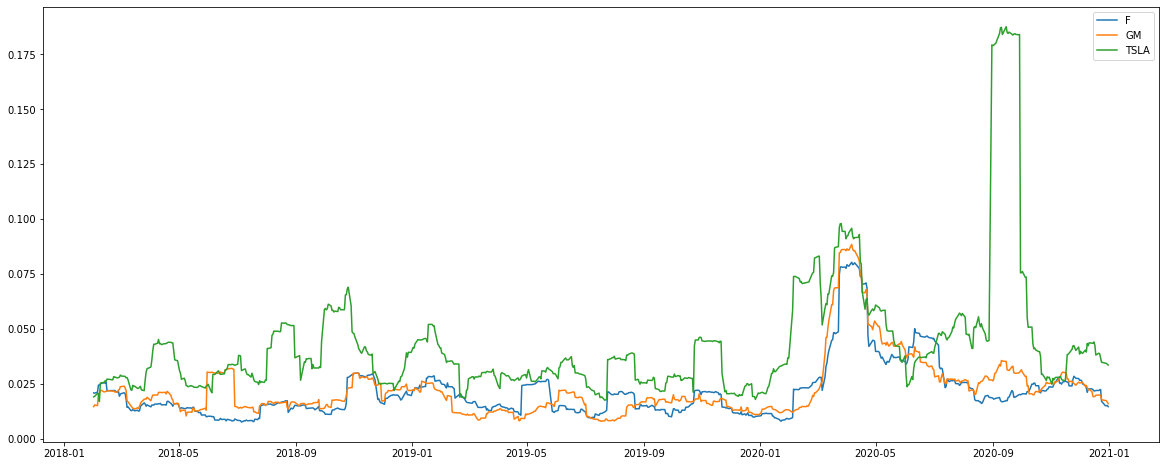

In [53]:
# Rolling Standard deviation 2018-2020
auto_std = auto_returns.rolling(window=21).std()
auto_std.plot(figsize=(20,8))

In [42]:
auto_returns.describe()

,F,GM,TSLA
count,755.000000,755.000000,755.000000
mean,-0.000176,0.000342,0.002904
std,0.024892,0.026419,0.051187
min,-0.111901,-0.156004,-0.774789
25%,-0.011282,-0.011814,-0.017474
50%,-0.000551,0.000766,0.002024
75%,0.011233,0.011015,0.022422
max,0.229927,0.198751,0.199545


In [52]:
auto_returns.std()

F       0.024892
GM      0.026419
TSLA    0.051187
dtype: float64

In [54]:
# Incorporate Auto Market Watch Data from Excel file 
from datetime import datetime,date
os.chdir(r"C:\Users\dmwal\Documents\FinTech2021\Project_1\Newly_Minted\data\clean_data")
auto_MW_data = pd.read_excel("Auto_MW_data.xlsx")
auto_MW_data.head()

,Ticker,Year,Revenue (in B),EPS,Std
0,F,2018-01-01,160.34,0.93,0.017421
1,GM,2018-01-01,147.05,5.66,0.020181
2,TSLA,2018-01-01,21.46,-2.37,0.036817
3,F,2019-01-01,155.90,0.01,0.017286
4,GM,2019-01-01,137.24,4.62,0.015486


In [55]:
# Correct date format
revenue_data["Year"] = pd.to_datetime(revenue_data["Year"]).dt.year
revenue_data

,Ticker,Year,Revenue (in B),EPS,Std
0,F,2018,160.34,0.93,0.017421
1,GM,2018,147.05,5.66,0.020181
2,TSLA,2018,21.46,-2.37,0.036817
3,F,2019,155.90,0.01,0.017286
4,GM,2019,137.24,4.62,0.015486
5,TSLA,2019,24.58,-1.14,0.030809
6,F,2020,127.14,-0.32,0.035382
7,GM,2020,122.49,4.36,0.038079
8,TSLA,2020,31.54,-0.98,0.074440


In [57]:
# Incorporate Auto Edgar Units Sold Data from Excel file 
from datetime import datetime,date
os.chdir(r"C:\Users\dmwal\Documents\FinTech2021\Project_1\Newly_Minted\data\clean_data")
auto_unit_data = pd.read_excel("Auto_Edgar_Unit_data.xlsx")
auto_unit_data

,Ticker,Year,Total Vehicle Sales,Total Vehicle Sales (in Thousands),Industry Volume,Industry Volume (in Thousands)
0,F,2018,5982000,5.982000,93756000,93.756
1,F,2019,5386000,5.386000,91338000,91.338
2,F,2020,4187000,4.187000,78583000,78.583
3,GM,2018,4707000,4.707000,93756000,93.756
4,GM,2019,4209000,4.209000,91338000,91.338
5,GM,2020,3370000,3.370000,78583000,78.583
6,TSLA,2018,245240,0.245240,93756000,93.756
7,TSLA,2019,367656,0.367656,91338000,91.338
8,TSLA,2020,499647,0.499647,78583000,78.583


In [63]:
# Add Plot to show change in number of units sold over 2018-2020